In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
import numpy as np
import math
# from generate_geoshape import *

In [2]:
N = 200
thick = 0.05
bound = 5.0
rad = 1.0
period = 5

In [3]:
# pos = sim_shapes(bound, N, rad, thick, period, noise_dist='uniform')

In [4]:
def circle(N, rad, thick, period, noise_dist):

    if noise_dist == 'uniform':
        noise = np.random.uniform(-thick / 2., thick / 2., N)
        rads = np.ones(N) * rad + noise
        angles = np.linspace(0, 2 * math.pi, int(N / period), endpoint=False)
        x = np.cos(angles)
        y = np.sin(angles) 
        pos = np.concatenate((x[None,:], y[None, :]), 0)
        pos = np.tile(pos, period) * rads
    elif noise_dist == 'gaussian':
        angles = np.linspace(0, 2 * math.pi, int(N / period))
        x = np.cos(angles) * rad
        y = np.sin(angles) * rad
        pos = np.concatenate((x[None,:], y[None, :]), 0)
        noise = np.random.normal(0.0, thick, (2, N))
        pos = np.tile(pos, period) + noise
    else:
        print('error : noise distribution undefined...either uniform or gaussian')
        return None    
#     fig = plt.figure(figsize=(5,5))
#     ax = fig.add_subplot(1,1,1)
#     ax.scatter(pos[0], pos[1])
#     ax.set_xlim([-3,3])
#     ax.set_ylim([-3,3])
    return pos

In [ ]:
pos = circle(N, rad, thick, period, noise_dist='gaussian')
np.save('circles/obs.npy', pos)

In [ ]:
def sim_cirlces(num_seqs, N, rad, thick, period, noise_dist):
    Pos = np.zeros((num_seqs, 2, N))
    Mus = np.zeros((num_seqs, 2))
    Rads = np.zeros(num_seqs)
    for i in range(num_seqs):
        pos = circle(N, rad, thick, pe#         fig = plt.figure(figsize=(5,5))
#         ax = fig.add_subplot(1,1,1)
#         ax.scatter(Pos[i, 0], Pos[i,1])
#         ax.set_xlim([-3,3])
#         ax.set_ylim([-3,3])riod, noise_dist)
        mu = np.random.uniform(-2, 2, 2)
        Pos[i] = mu[:, None] + pos2
        Mus[i] = mu
        Rads[i] = rad
#         fig = plt.figure(figsize=(5,5))
#         ax = fig.add_subplot(1,1,1)
#         ax.scatter(Pos[i, 0], Pos[i,1])
#         ax.set_xlim([-3,3])
#         ax.set_ylim([-3,3])
    return Pos, Mus, Rads

In [ ]:
num_seqs = 100
Pos, Mus, Rads = sim_cirlces(num_seqs, N, rad, thick, period, noise_dist='gaussian')
np.save('circles/obs.npy', Pos)
np.save('circles/mus.npy', Mus)
np.save('circles/rads.npy', Rads)

In [16]:
def square(N, rad, thick, period, noise_dist):
    if noise_dist == 'uniform':
        noise = np.random.uniform(-thick / 2., thick / 2., N)
    elif noise_dist == 'gaussian':
        noise = np.random.normal(0.0, thick, (2, N))
    else:
        print('error : noise distribution undefined...either uniform or gaussian')
        return None
    rotate = np.array([[np.cos(math.pi/4.), - np.sin(math.pi/4.)], [np.sin(math.pi/4.), np.cos(math.pi/4.)]])
    
    pts_edge = int((N / period) / 4.)
    bottom_x = np.linspace(-rad, rad, pts_edge)
    bottom_y = np.ones(pts_edge) * (-rad)
    
    left_x = np.ones(pts_edge) * (-rad)
    left_y = np.linspace(-rad, rad, pts_edge)
    
    top_x = np.linspace(-rad, rad, pts_edge)
    top_y = np.ones(pts_edge) * (rad)
 
    right_x = np.ones(pts_edge) * (rad)
    right_y = np.linspace(-rad, rad, pts_edge)


    x = np.concatenate((bottom_x, left_x, top_x, right_x), 0)
    y = np.concatenate((bottom_y, left_y, top_y, right_y), 0)
    x = np.tile(x, period)
    y = np.tile(y, period)
    pos = np.concatenate((x[None,:], y[None, :]), 0) + noise
#     pos = np.dot(rotate, pos)
#     fig = plt.figure(figsize=(5,5))
#     ax = fig.add_subplot(1,1,1)
#     ax.scatter(pos[0], pos[1])
#     ax.set_xlim([-3,3])
#     ax.set_ylim([-3,3])
    return pos

In [ ]:
N = 200
period = 5
rad = 1.0
pos = square(N, rad, thick, period, noise_dist='gaussian')
np.save('squares/obs.npy', pos)

In [ ]:
def sim_squares(num_seqs, N, rad, thick, period, noise_dist='uniform'):
    Pos = np.zeros((num_seqs, 2, N))
    Mus = np.zeros((num_seqs, 2))
    Rads = np.zeros(num_seqs)
    for i in range(num_seqs):
        pos = square(N, rad, thick, period, noise_dist='uniform')
        mu = np.random.uniform(-2, 2, 2)
        Pos[i] = mu[:, None] + pos
        Mus[i] = mu
        Rads[i] = rad
    return Pos, Mus, Rads

num_seqs = 100
Pos, Mus, Rads = sim_squares(num_seqs, N, rad, thick, period, noise_dist='uniform')
np.save('squares/obs.npy', Pos)
np.save('squares/mus.npy', Mus)
np.save('squares/rads.npy', Rads)

In [5]:
def cross(N, rad, thick, period, noise_dist='uniform'):
    if noise_dist == 'uniform':
        noise = np.random.uniform(-thick / 2., thick / 2., N)
    elif noise_dist == 'gaussian':
        noise = np.random.normal(0.0, thick, (2, N))
    else:
        print('error : noise distribution undefined...either uniform or gaussian')
        return None
    
    rotate = np.array([[np.cos(math.pi/4.), - np.sin(math.pi/4.)], [np.sin(math.pi/4.), np.cos(math.pi/4.)]])
    pts_edge = int((N / period) / 2.)
    vertical_x = np.zeros(pts_edge)
    vertical_y = np.linspace(-rad, rad, pts_edge)
    
    horizontal_y = np.zeros(pts_edge)
    horizontal_x = np.linspace(-rad, rad, pts_edge)

    
    x = np.concatenate((vertical_x, horizontal_x), 0)
    y = np.concatenate((vertical_y, horizontal_y), 0)
    pos = np.concatenate((x[None, :], y[None, :]), 0)
    pos = np.dot(rotate, pos) 
    pos = np.tile(pos, (1, period)) + noise
#     fig = plt.figure(figsize=(5,5))
#     ax = fig.add_subplot(1,1,1)
#     ax.scatter(pos[0], pos[1])    
    return pos

In [6]:
def sim_crosses(num_seqs, N, rad, thick, period, noise_dist):
    Pos = np.zeros((num_seqs, 2, N))
    Mus = np.zeros((num_seqs, 2))
    Rads = np.zeros(num_seqs)
    for i in range(num_seqs):
        pos = cross(N, rad, thick, period, noise_dist)
        mu = np.random.uniform(-2, 2, 2)
        Pos[i] = mu[:, None] + pos
        Mus[i] = mu
        Rads[i] = rad
    return Pos, Mus, Rads

In [7]:
N = 200
thick = 0.05
num_seqs = 100
Pos, Mus, Rads = sim_crosses(num_seqs, N, rad, thick, period, noise_dist='gaussian')
np.save('crosses/obs.npy', Pos)
np.save('crosses/mus.npy', Mus)
np.save('crosses/rads.npy', Rads)

In [ ]:
N = 200
period = 5
pos = cross(N, rad* np.sqrt(2), thick, period, noise_dist='gaussian')
np.save('crosses/obs.npy', pos)

In [10]:
def triangle(N, rad, thick, period, noise_dist='uniform'):
    if noise_dist == 'uniform':
        noise = np.random.uniform(-thick / 2., thick / 2., N)
    elif noise_dist == 'gaussian':
        noise = np.random.normal(0.0, thick, (2, N))
    else:
        print('error : noise distribution undefined...either uniform or gaussian')
        return None
    
    right_rotate = np.array([[np.cos(math.pi/6.), - np.sin(math.pi/6.)], [np.sin(math.pi/6.), np.cos(math.pi/6.)]])
    left_rotate = np.array([[np.cos(math.pi/6.), np.sin(math.pi/6.)], [- np.sin(math.pi/6.), np.cos(math.pi/6.)]])
    
    pts_edge = int((N / period ) / 3.)
    bottom_x = np.linspace(-rad, rad, pts_edge)
    bottom_y = np.zeros(pts_edge)
    bottom_pos = np.concatenate((bottom_x[None, :], bottom_y[None, :]), 0)
    
    left_x = np.zeros(pts_edge)
    left_y = np.linspace(0, 2*rad, pts_edge)
    left_pos = np.concatenate((left_x[None, :], left_y[None, :]), 0)
    left_pos = np.dot(left_rotate, left_pos)
    left_pos[0] = left_pos[0] - rad
    
    right_x = np.zeros(pts_edge)
    right_y = np.linspace(0, 2*rad, pts_edge)
    right_pos = np.concatenate((right_x[None, :], right_y[None, :]), 0)
    right_pos = np.dot(right_rotate, right_pos) 
    right_pos[0] = right_pos[0] + rad

    pos = np.concatenate((bottom_pos, right_pos, np.flip(left_pos, -1)), -1)
    pos = np.tile(pos, (1, period))
    pos[1] = pos[1] - rad * np.sqrt(3) /2 
    pos = pos + noise
#     fig = plt.figure(figsize=(5,5))
#     ax = fig.add_subplot(1,1,1)
#     ax.scatter(pos[0], pos[1])  
    return pos

In [11]:
def sim_triangles(num_seqs, N, rad, thick, period, noise_dist):
    Pos = np.zeros((num_seqs, 2, N))
    Mus = np.zeros((num_seqs, 2))
    Rads = np.zeros(num_seqs)
    for i in range(num_seqs):
        pos = triangle(N, rad, thick, period, noise_dist)
        mu = np.random.uniform(-2, 2, 2)
        Pos[i] = mu[:, None] + pos
        Mus[i] = mu
        Rads[i] = rad
    return Pos, Mus, Rads

In [ ]:
N = 210
period = 5
thick = 0.05
pos = triangle(N, rad, thick, period, noise_dist='gaussian')
np.save('triangles/obs.npy', pos)

In [13]:
num_seqs = 100
N = 210
period = 5
thick = 0.05
Pos, Mus, Rads = sim_triangles(num_seqs, N, rad, thick, period, noise_dist='gaussian')
np.save('triangles/obs.npy', Pos)
np.save('triangles/mus.npy', Mus)
np.save('triangles/rads.npy', Rads)

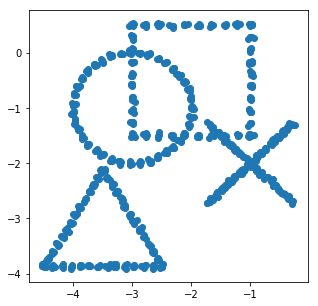

In [45]:
thick = 0.02
noise_dist = 'gaussian'

Mus = np.array([[-3, -1], [-2, -0.5], [-1, -2], [-3.5, -3]])
pos_c = circle(200, rad, thick, period, noise_dist) + Mus[0][:, None]
pos_s = square(200, rad, thick, period, noise_dist)+ Mus[1][:, None]
pos_x = cross(200, rad, thick, period, noise_dist)+ Mus[2][:, None]
pos_t = triangle(210, rad, thick, period, noise_dist)+ Mus[3][:, None]
pos = np.concatenate((pos_c, pos_s, pos_x, pos_t), 1)


fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.scatter(pos[0], pos[1])    
np.save('Shapes3.npy', pos)
np.save('Mus3.npy', Mus)

In [ ]:
mu